In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [150]:
%matplotlib inline

In [151]:
df = pd.read_csv("Phishing.csv")
df.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [152]:
df.columns[0]

'having_IP_Address'

In [153]:
df.shape

(11055, 31)

# Check for duplicates values

In [155]:
df.duplicated().sum()

5206

In [156]:
df.drop_duplicates(inplace = True) # Dropping duplicates

In [157]:
df.duplicated().sum()

0

In [158]:
df.shape

(5849, 31)

# Check for Null values

In [160]:
df.isnull().sum().sum() # No Null values

0

# Check if target is balanced or imbalanced

In [162]:
df["Result"].value_counts() #Class is not imbalanced as they are in ratio of approx 3:2

Result
-1    3019
 1    2830
Name: count, dtype: int64

In [163]:
# Check for SD to see if there is any columns with SD = 0. 

In [293]:
df.info() # Looks like all the coloumns have fair bit of deviation which is good for model training

<class 'pandas.core.frame.DataFrame'>
Index: 1755 entries, 6059 to 1666
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            1755 non-null   int64
 1   URL_Length                   1755 non-null   int64
 2   Shortining_Service           1755 non-null   int64
 3   having_At_Symbol             1755 non-null   int64
 4   double_slash_redirecting     1755 non-null   int64
 5   Prefix_Suffix                1755 non-null   int64
 6   having_Sub_Domain            1755 non-null   int64
 7   SSLfinal_State               1755 non-null   int64
 8   Domain_registeration_length  1755 non-null   int64
 9   Favicon                      1755 non-null   int64
 10  port                         1755 non-null   int64
 11  HTTPS_token                  1755 non-null   int64
 12  Request_URL                  1755 non-null   int64
 13  URL_of_Anchor                1755 non-null   int64

In [165]:
# Visualization of Data

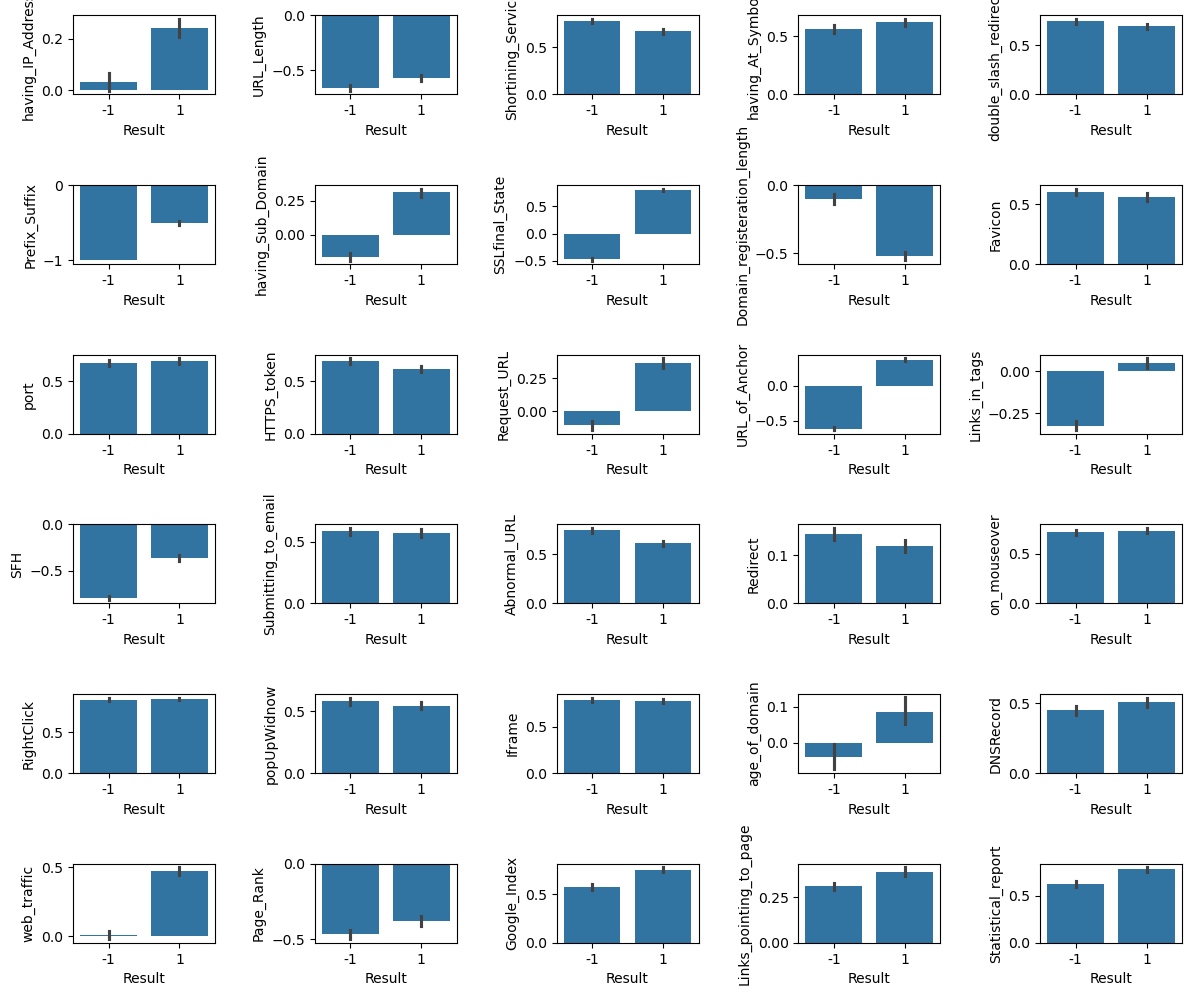

In [166]:
plt.figure(figsize=(12, 13))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(8,5,i+1)
    sns.barplot(df, y = col, x = "Result")
plt.tight_layout(pad=1.0, w_pad=2 , h_pad=3.0)
plt.show()

In [167]:
# Insight - Over all the classes (-1,1) are equally distribted amoung features barring 2 or 3 columns

# Lets find the corelation 

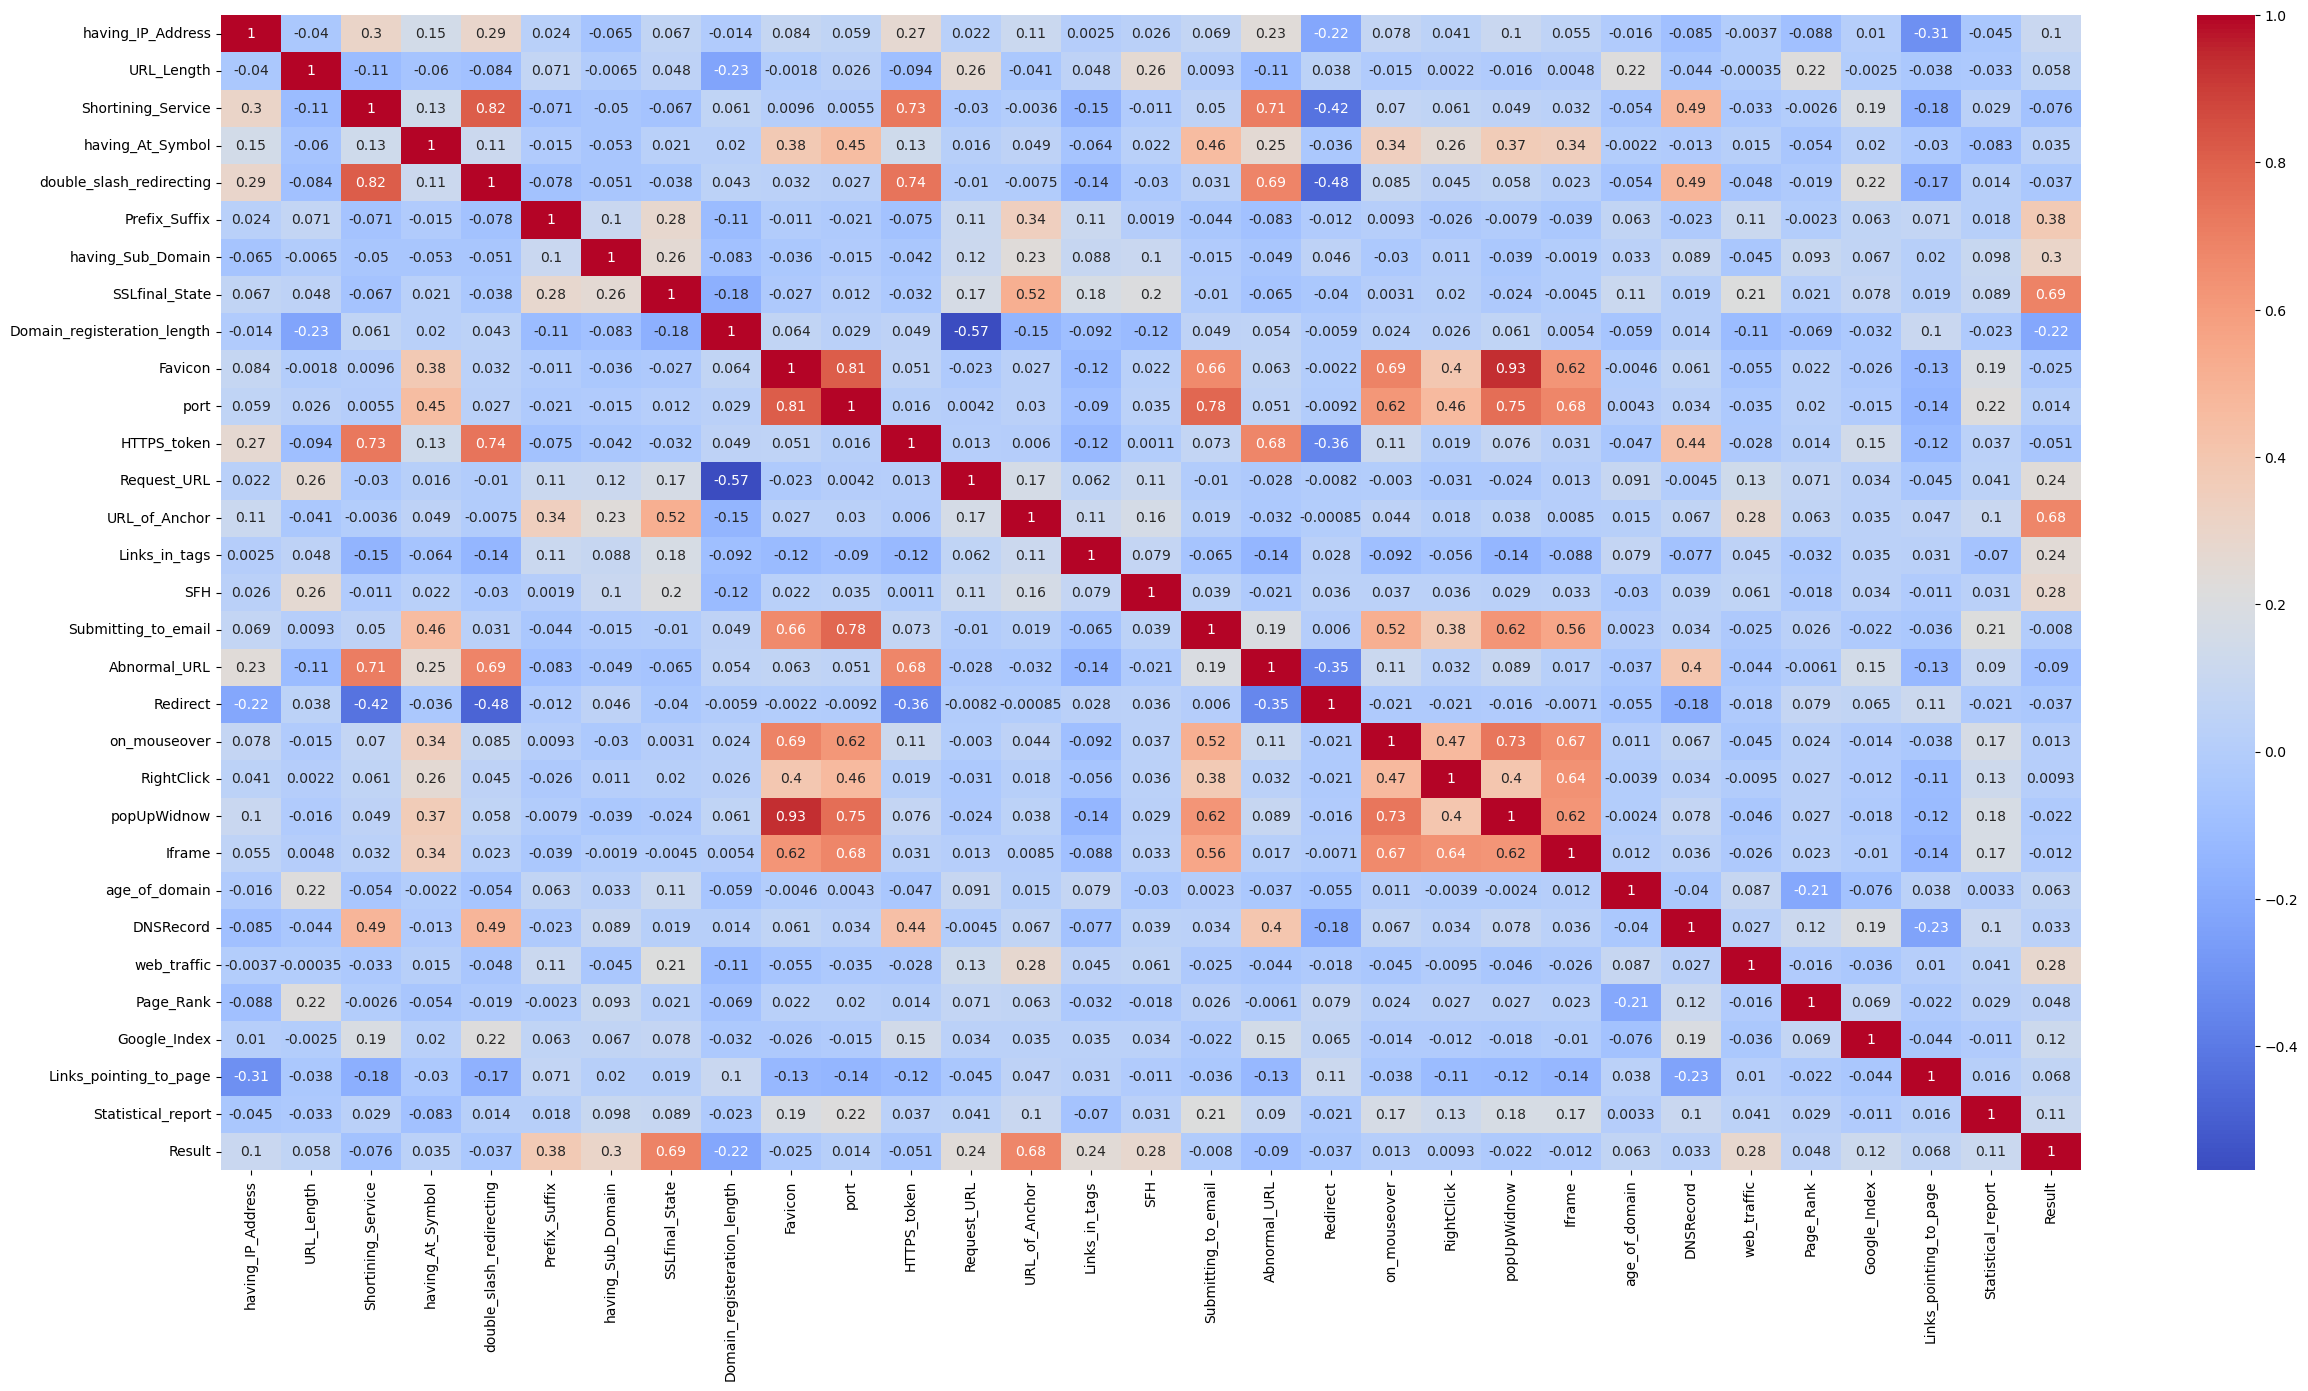

In [169]:
plt.figure(figsize=(30, 15))  # Adjust size as needed
sns.heatmap(df.corr(), annot=True, cmap="coolwarm",xticklabels='auto',yticklabels='auto')
plt.show()

# Lets get top 20 correlations

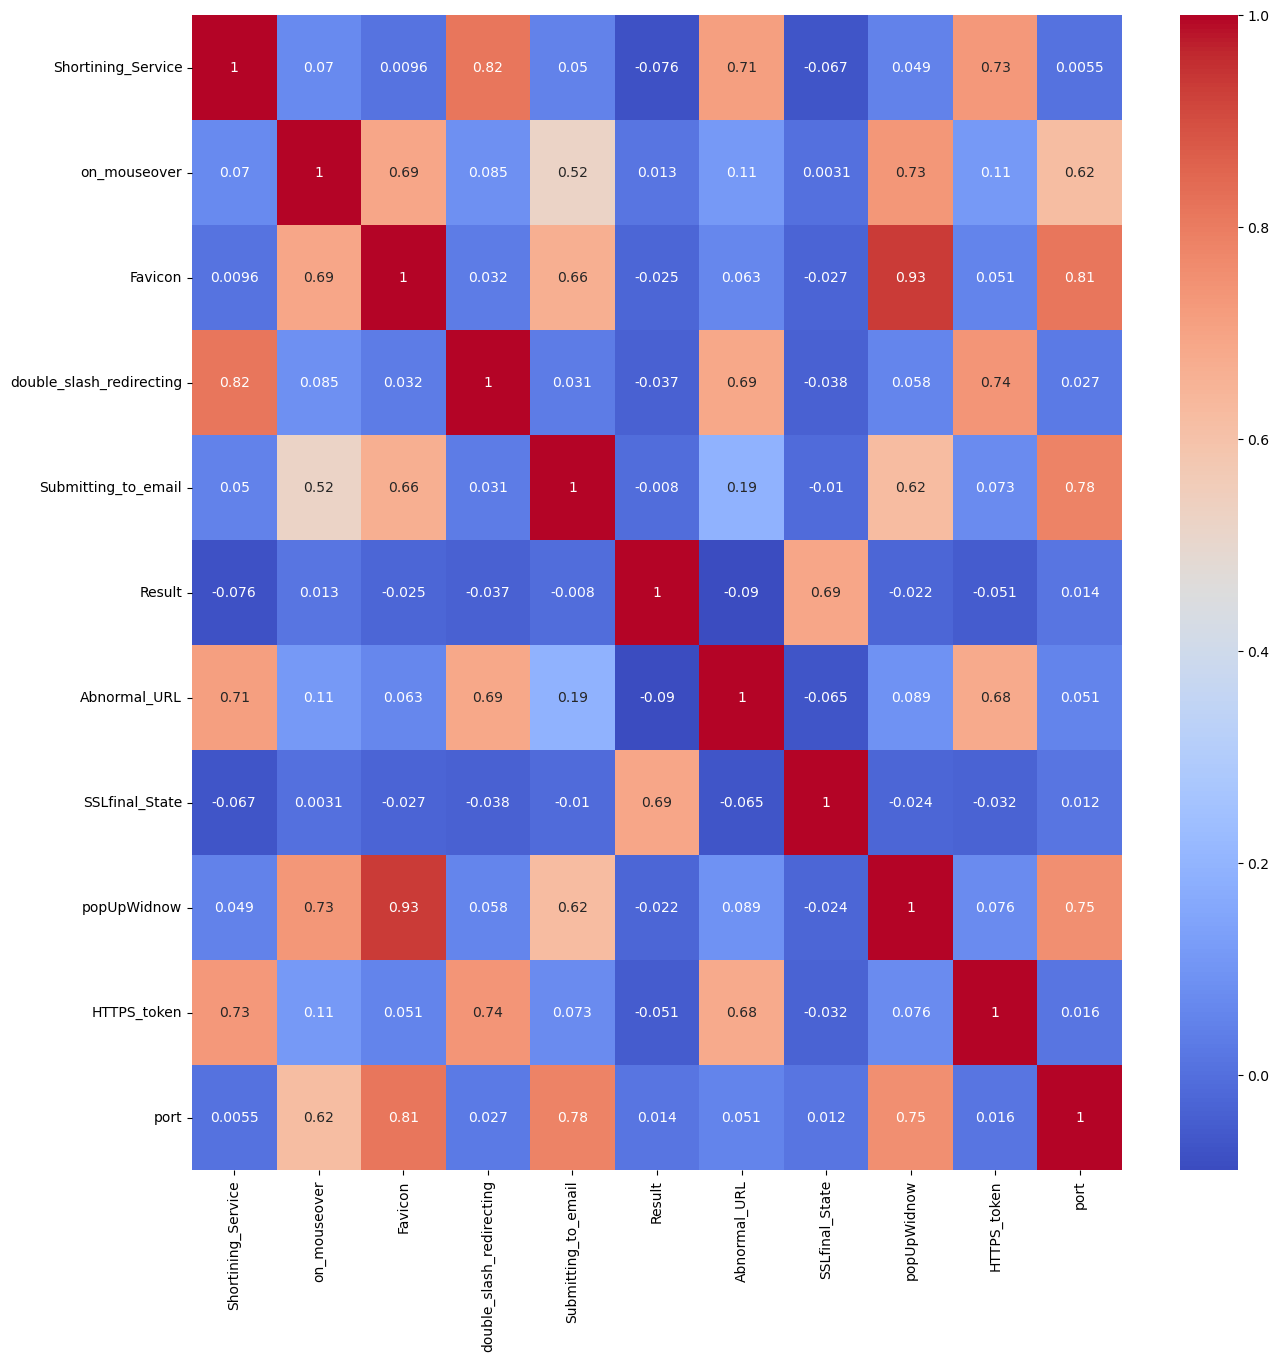

In [171]:
n = 20
correlations = df.corr().unstack().abs().sort_values(ascending=False)
top_correlations = correlations[correlations != 1].head(n)

# Extract corresponding columns
top_columns = list(set([col for pair in top_correlations.index for col in pair]))

# Plot heatmap for top correlated columns
plt.figure(figsize=(15, 15))
sns.heatmap(df[top_columns].corr(), annot=True, cmap="coolwarm")
plt.show()

In [172]:
# Insight. Below columns are co-related. 
# We can keep any one columns among below pair (either Favicon or popUpWidnow ) to reduce the curse of dimensionality.
# Favicon                      popUpWidnow                    0.933145
# popUpWidnow                  Favicon                        0.933145
# double_slash_redirecting     Shortining_Service             0.815809
# Shortining_Service           double_slash_redirecting       0.815809
# Favicon                      port                           0.812657

# Split to x and Y

In [174]:
x = df.drop("Result", axis = 1)
y = df[[df.columns[-1]]]

In [175]:
y.replace({-1: 0}, inplace=True)

# Train test and split

In [273]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state = 1)

In [275]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4094, 30), (1755, 30), (4094, 1), (1755, 1))

In [207]:
y_test

Result
6059        1
2616        0
9562        0
9667        0
759         1
8324        0
6004        1
8760        0
2684        1
8441        0
8557        1
8071        0
5424        1
8788        0
726         0
10508       1
5304        1
3411        0
10281       0
7003        1
2816        0
5848        0
6356        0
287         1
8610        0
1099        1
8489        0
5535        0
9602        0
9358        0
8663        0
6900        1
6070        0
303         0
8643        0
7730        0
5599        0
9164        0
7239        0
8848        1
457         1
8295        0
9632        0
2881        0
10433       0
10414       0
1174        0
179         1
1122        0
6374        0
5520        0
224         0
9019        0
2929        0
6436        1
1009        0
5917        1
6238        1
5476        1
9484        0
727         1
8432        1
1724        1
8564        1
9044        1
9311        0
9459        0
5601        1
9322        0
5289        1
5353        1
9124        1
8718        0
8204        1
9111        0
2395        0
5280        1
9287        0
927         0
5904        1
9216        0
1311        1
8235        1
44          0
7144        1
7091        1
8680        1
6018        1
8074        0
8900        0
7045        1
6296        1
6729        0
3342        0
673         0
4           1
6781        1
136         0
5703        0
572         0
7538        0
2203        1
1250        1
5283        0
8370        1
1065        0
6740        0
9704        1
10225       1
2610        1
8605        1
752         1
5495        0
6036        0
2611        0
6222        0
5554        0
1094        0
9001        0
8286        1
602         1
3057        0
5729        0
8457        1
2260        0
5410        1
5480        1
1456        1
169         1
499         1
9270        0
765         0
1310        1
5383        0
424         1
8712        0
6701        0
7637        1
2153        1
5208        0
8241        1
9080        1
485         0
6535        1
6553        1
1894        1
10515       0
334         0
8726        1
993         1
270         0
9453        1
8832        1
21          1
2037        0
10620       0
5416        1
10122       1
6307        1
9478        1
1992        0
1818        1
10295       1
6931        1
8458        1
7392        1
6626        1
671         1
10325       0
1803        1
6008        0
5982        0
10629       0
9555        0
6907        0
6623        1
9275        0
5684        0
6531        0
6691        0
6406        0
5614        1
8880        0
9912        0
147         1
7563        0
116         0
7387        1
8400        1
7508        0
593         1
9118        0
5354        1
8912        0
7643        0
766         1
428         1
7085        0
10535       1
201         1
6715        0
826         1
8630        1
5600        1
8330        1
7049        1
8309        1
8254        0
6285        1
7431        0
6061        1
5538        0
5397        1
563         1
7273        1
9371        0
2503        1
9770        0
235         1
9206        0
509         1
6806        0
391         1
6053        1
8677        1
2265        0
8681        1
1470        0
1560        1
7460        0
2087        0
8672        1
6769        1
6231        0
748         1
10896       0
9250        0
2644        0
699         0
8462        0
2804        0
3308        0
6324        1
9915        1
8939        1
7086        0
141         0
8847        0
6868        1
310         1
5526        1
6126        0
28          1
6585        0
6522        0
3184        0
414         0
6350        1
2458        1
8570        1
9093        0
9879        1
1104        0
8332        0
8401        0
5169        0
8792        0
6375        1
633         0
10520       0
6121        1
5800        0
10618       0
10730       0
1817        1
10434       0
357         1
1113        1
2327        1
7083        0
5459        1
6279        1
6039        1
2593        0
2490        1
105

In [179]:
pip install dagshub

# Model Training

In [181]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score

In [182]:
models = { "LR" : LogisticRegressionCV(),
          "SVC" : SVC(),
          "LSVC" : LinearSVC(),
          "RFC" : RandomForestClassifier(),
          "ABC" : AdaBoostClassifier(),
          "GBC" : GradientBoostingClassifier(),
          "XGBC" : XGBClassifier(),
          "DTC" : DecisionTreeClassifier(),
          "GNB" : GaussianNB()
         }

In [183]:
pip install dagshub

Note: you may need to restart the kernel to use updated packages.


In [184]:
import dagshub
dagshub.init(repo_owner='chetanfernandes',
             repo_name='End-to-End-ML-project-with-MLFlow',
             mlflow=True)

Initialized MLflow to track repo "chetanfernandes/End-to-End-ML-project-with-MLFlow"

Repository chetanfernandes/End-to-End-ML-project-with-MLFlow initialized!

In [185]:
import mlflow
with mlflow.start_run():
  mlflow.log_param('parameter name', 'value')
  mlflow.log_metric('metric name', 1)

🏃 View run orderly-bear-665 at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/4/runs/eb6f3ddb78c24038ba8cef534b4d20f5
🧪 View experiment at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/4


In [186]:
Phising_experiment = mlflow.set_experiment("Phishing_1.2_test_data")

Scores [92.55189255 91.08669109 93.28449328 92.06349206 91.68704156]
Mean Score 0.9213472211027224
AUC Score 0.9123820466244386
Model Score 0.9123820466244386


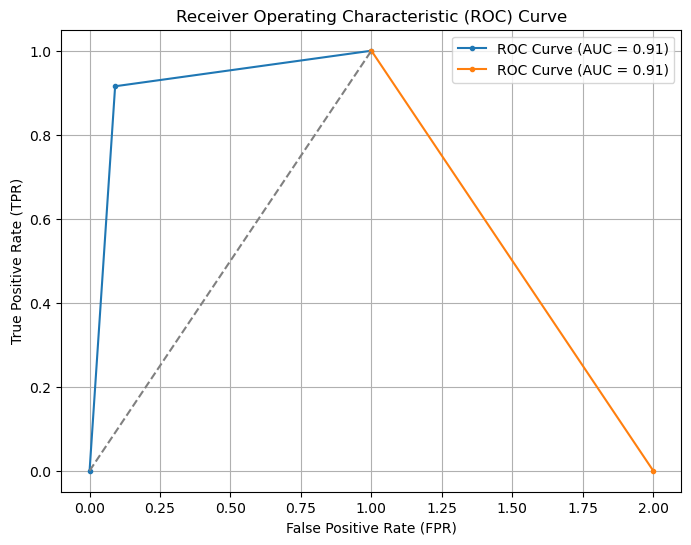

***********************************
🏃 View run LR at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/4/runs/9964fa3646204a549798b6180cfee3b6
🧪 View experiment at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/4
Scores [93.52869353 93.04029304 94.26129426 94.13919414 93.15403423]
Mean Score 0.9362470183986076
AUC Score 0.9367605956352697
Model Score 0.9367605956352697


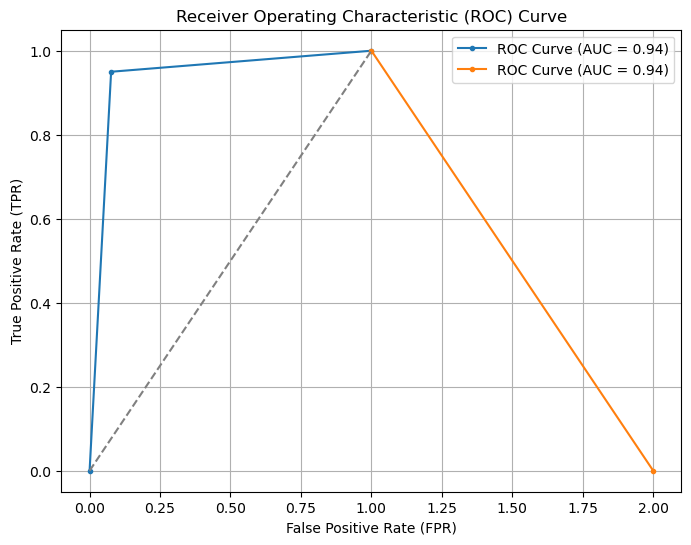

***********************************
🏃 View run SVC at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/4/runs/d1dde9bd93c94f7da8fa5d812afa0254
🧪 View experiment at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/4
Scores [92.18559219 91.20879121 93.16239316 92.7960928  91.68704156]
Mean Score 0.9220798218353231
AUC Score 0.9135238457094377
Model Score 0.9135238457094377


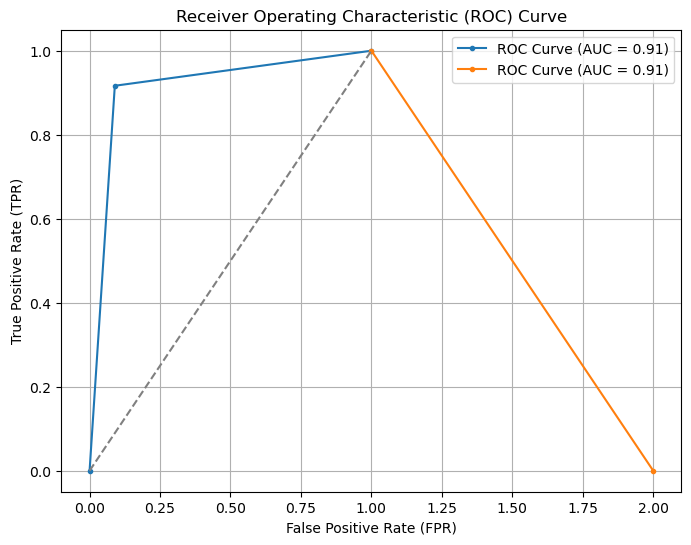

***********************************
🏃 View run LSVC at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/4/runs/4dd1fb1d9d0943ec82f0198f52888865
🧪 View experiment at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/4
Scores [94.01709402 94.99389499 94.99389499 93.89499389 93.88753056]
Mean Score 0.9435748169244501
AUC Score 0.9448481765045724
Model Score 0.9448481765045724


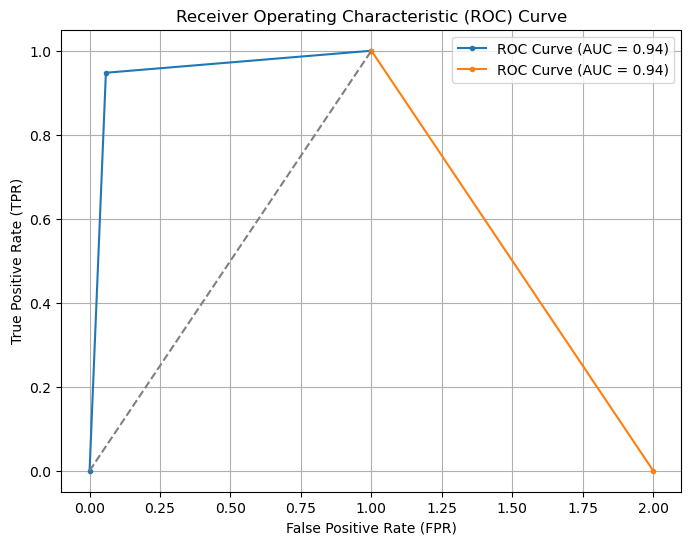

***********************************
🏃 View run RFC at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/4/runs/55f8dbbadeb940beb897e3097171e104
🧪 View experiment at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/4
Scores [93.52869353 92.18559219 93.16239316 94.01709402 93.39853301]
Mean Score 0.9325846118022157
AUC Score 0.9337307618239639
Model Score 0.9337307618239639


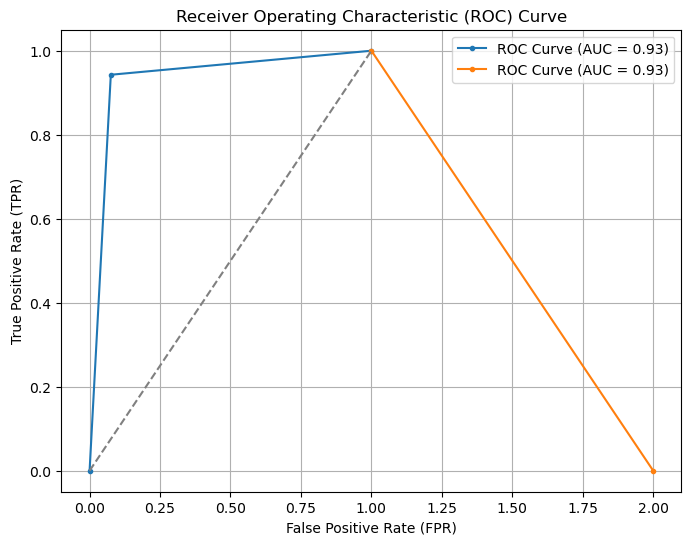

***********************************
🏃 View run ABC at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/4/runs/3871a36f3b634ea8bd0da8ebf60c6694
🧪 View experiment at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/4
Scores [95.11599512 94.01709402 95.72649573 93.89499389 94.13202934]
Mean Score 0.9457732161888641
AUC Score 0.9439568575607269
Model Score 0.9439568575607269


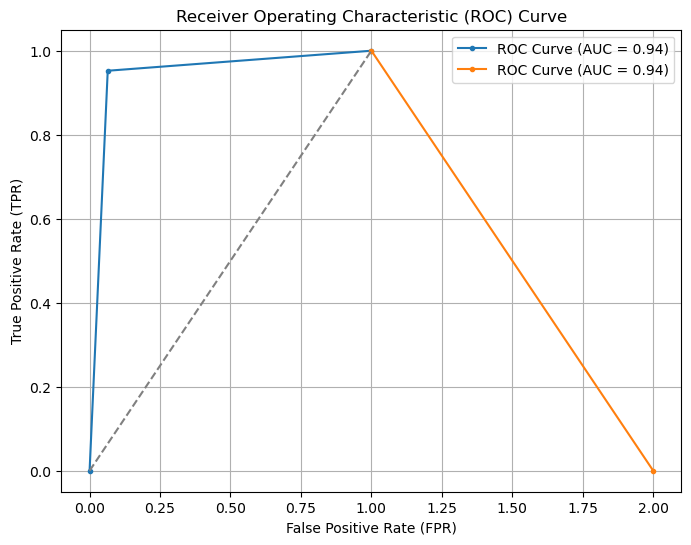

***********************************
🏃 View run GBC at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/4/runs/13868c94328c446581f235a1fb782cca
🧪 View experiment at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/4
Scores [95.6043956  95.48229548 94.99389499 94.38339438 94.00977995]
Mean Score 0.9489475208301613
AUC Score 0.9470816786463404
Model Score 0.9470816786463404


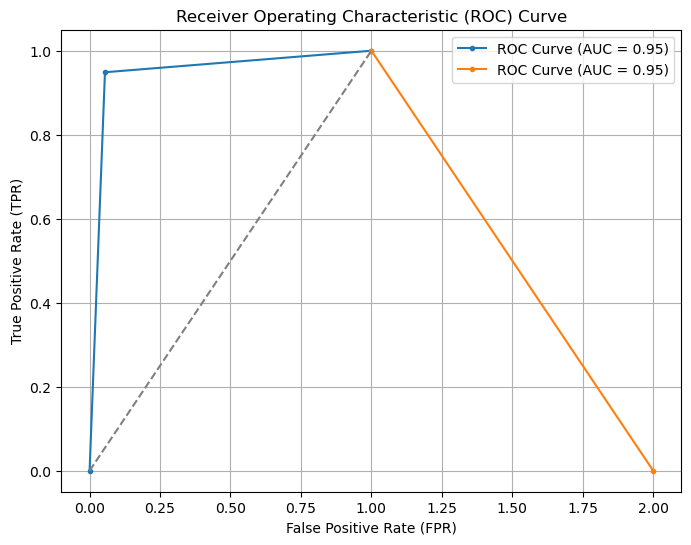

***********************************
🏃 View run XGBC at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/4/runs/a128eb997b5e46c9b9f6af20d329b6c4
🧪 View experiment at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/4
Scores [92.42979243 93.28449328 92.55189255 92.42979243 91.44254279]
Mean Score 0.9242770269665135
AUC Score 0.9221071820788941
Model Score 0.9221071820788941


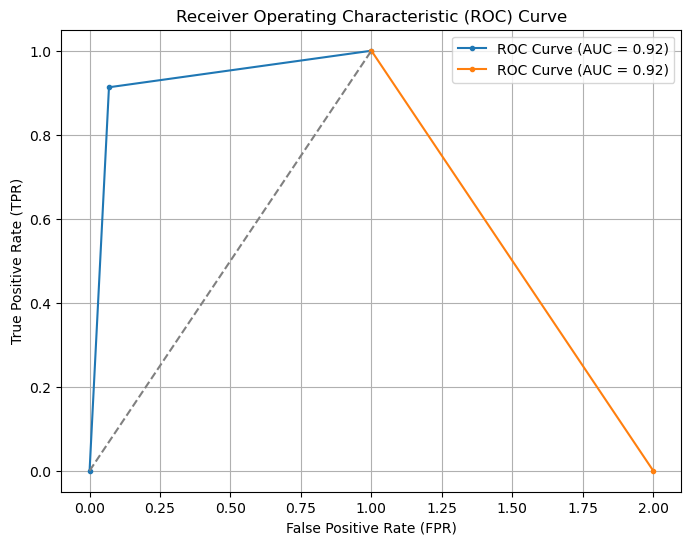

***********************************
🏃 View run DTC at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/4/runs/a86349acce8f4ff8897cf3f7aa2c677d
🧪 View experiment at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/4
Scores [66.05616606 65.81196581 66.66666667 65.56776557 65.40342298]
Mean Score 0.6590119741708984
AUC Score 0.6519666269368296
Model Score 0.6519666269368296


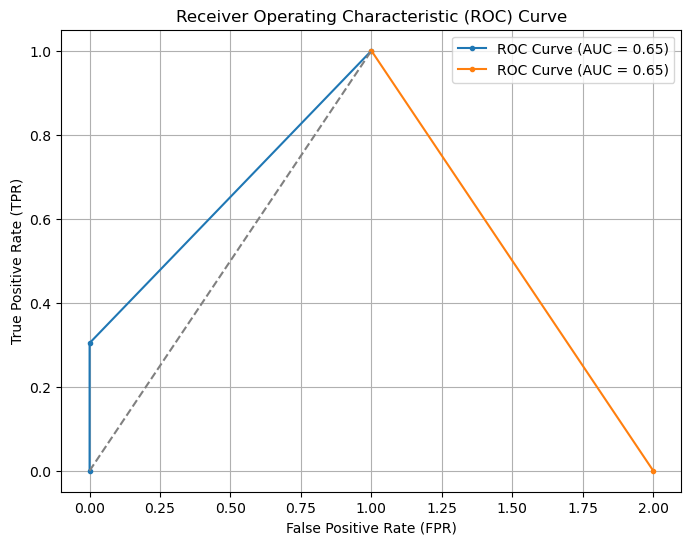

***********************************
🏃 View run GNB at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/4/runs/9f275f3ba092432c99cbb936d85fa4ae
🧪 View experiment at: https://dagshub.com/chetanfernandes/End-to-End-ML-project-with-MLFlow.mlflow/#/experiments/4
Model with highest accuracy is -> 94.70816786463404. Model name is XGBC


In [187]:
model_list = []
report = []
for i in range(len(models)):
    model = (list(models.values())[i])
    scores = cross_val_score(model, X_train, y_train, cv = 5)
    print("Scores", scores * 100)
    print("Mean Score", np.mean(scores))
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test,y_pred)
    auc_score = roc_auc_score(y_test,y_pred)
    model_score = accuracy_score(y_test,y_pred)
    
    metrics = {"auc_score": auc_score, "Accuracy Score": model_score}

    #print(classification_report(y_train,y_pred))
    #print(f" fpr {fpr}, tpr {tpr}, threshold {thresholds}")
    print("AUC Score", auc_score)
    print("Model Score", auc_score)
    #print(f"Accuracy score of {model} is {auc_score * 100}")
    report.append(auc_score*100)
    model_list.append(list(models.keys())[i])
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr,thresholds, marker='.', label=f'ROC Curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random guessing
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.grid()
    plt.show()
    run_name = model_list[i]
    artifact_path = model_list[i]
    with mlflow.start_run(run_name=run_name) as run:
        # Log the parameters used for the model fit
        # mlflow.log_params(params)
    
        # Log the error metrics that were calculated during validation
        mlflow.log_metrics(metrics)
    
        # Log an instance of the trained model for later use
        model_info = mlflow.sklearn.log_model(sk_model= model, input_example=X_train, artifact_path=artifact_path)
        print("*"*35)
        
            
print(f"Model with highest accuracy is -> {max(report)}. Model name is {model_list[report.index(max(report))]}")

In [188]:
import mlflow
logged_model = 'runs:/fa242b50186e448eb4a9b7461beecc38/RFC'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

y_pred = loaded_model.predict(X_test)

In [189]:
df = pd.DataFrame(X_test, columns = X_test.columns)

In [190]:
result = pd.DataFrame(X_test, columns=X_test.columns)
result["actual_class"] = y_test
result["predicted_class"] = y_pred
result['predicted_class'] = result['predicted_class'].map({0:"spam",1: "Notspam"})
result

having_IP_Address  URL_Length  Shortining_Service  having_At_Symbol  \
6059                  -1          -1                   1                -1   
2616                   1          -1                   1                -1   
9562                  -1          -1                   1                 1   
9667                  -1          -1                   1                -1   
759                    1           1                   1                 1   
8324                  -1          -1                   1                 1   
6004                   1          -1                   1                 1   
8760                   1          -1                   1                 1   
2684                  -1          -1                  -1                 1   
8441                  -1          -1                   1                -1   
8557                   1          -1                   1                 1   
8071                   1          -1                   1                 1   
5424                   1          -1                   1                 1   
8788                  -1          -1                   1                 1   
726                    1          -1                   1                 1   
10508                 -1          -1                   1                -1   
5304                   1           1                   1                 1   
3411                  -1          -1                  -1                 1   
10281                 -1          -1                   1                 1   
7003                   1          -1                   1                 1   
2816                   1           1                   1                -1   
5848                  -1          -1                   1                 1   
6356                   1          -1                   1                 1   
287                    1          -1                   1                -1   
8610                  -1           1                   1                 1   
1099                   1          -1                   1                 1   
8489                   1          -1                   1                 1   
5535                  -1           0                   1                 1   
9602                  -1          -1                   1                 1   
9358                  -1          -1                   1                 1   
8663                   1           1                   1                 1   
6900                   1          -1                   1                 1   
6070                   1           1                   1                -1   
303                    1          -1                   1                 1   
8643                   1          -1                   1                 1   
7730                  -1          -1                   1                -1   
5599                  -1          -1                   1                 1   
9164                   1          -1                   1                 1   
7239                  -1          -1                  -1                -1   
8848                  -1          -1                   1                 1   
457                    1          -1                   1                 1   
8295                  -1          -1                   1                -1   
9632                   1          -1                   1                 1   
2881                   1          -1                   1                -1   
10433                  1          -1                   1                 1   
10414                 -1          -1                  -1                -1   
1174                   1          -1                   1                 1   
179                    1          -1                   1                 1   
1122                  -1          -1                  -1                 1   
6374                  -1          -1                   1                 1   
5520                   1     

In [191]:
os.path.getsize(filepath)

NameError: name 'filepath' is not defined

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler 

In [ ]:
pipeline = Pipeline([('scaler', RobustScaler())])

In [ ]:
pipeline

In [ ]:
import os

In [ ]:
metrics = {"auc_score": auc_score, "Accuracy Score": model_score}

In [ ]:
metric = os.path.join("report","metric.json")
metric

In [ ]:
def save_json(path, metrics:dict, model):
   
        dir_path = os.path.dirname(base_path)
        print(dir_path)
        os.makedirs(dir_path, exist_ok=True)
        file_path = os.path.join(dir_path, f"{model}_metrics.json")
        
        with open(file_path, "w") as file:
            json.dump(metrics, file, indent=4)

In [ ]:
save_json(path=metric, metrics, model=model)

In [ ]:
metrics

In [ ]:

save_json(path=Path(self.config.metric_file_name), data=scores)

In [ ]:
 ravel()

In [ ]:

    with open(path, "w") as f:
        json.dump(data, f, indent=4)

    logger.info(f"json file saved at: {path}")

In [245]:
from xgboost import XGBClassifier
XGBClassifier = XGBClassifier()

In [249]:

    scores = cross_val_score(XGBClassifier, X_train, y_train, cv = 5)
    print("Scores", scores * 100)
    print("Mean Score", np.mean(scores))

Scores [95.6043956  95.48229548 94.99389499 94.38339438 94.00977995]
Mean Score 0.9489475208301613


In [220]:
X_train.shape

(4094, 30)

In [233]:
type(X_test)

pandas.core.frame.DataFrame

In [277]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [281]:
y_test.shape

(1755,)

In [283]:
from sklearn.preprocessing import RobustScaler

In [285]:
scaler = RobustScaler()

In [287]:
scaler.fit_transform(X_train)

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [-1.,  2., -2., ...,  0., -1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1., -2.],
       [-1.,  0.,  0., ...,  0.,  1.,  0.]])

In [289]:
scaler.transform(X_test)

array([[-1.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1., -2.],
       [-1.,  0.,  0., ..., -2.,  1., -2.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [-1.,  0., -2., ...,  0.,  1.,  0.]])

In [291]:
import numpy as np

# Check for infinite values
if np.any(np.isinf(X_train)) or np.any(np.isinf(y_train)):
    print("Infinite values detected!")
else:
    print("No")


No


In [297]:
from sklearn.model_selection import cross_validate

In [299]:
  scores = cross_validate(model, X_train, y_train, cv = 5, scoring = 'accuracy')

In [311]:
list(scores)

['fit_time', 'score_time', 'test_score']

In [313]:
scores['test_score']

array([0.66056166, 0.65811966, 0.66666667, 0.65567766, 0.65403423])

In [315]:
scores = cross_val_score(model, X_train, y_train, cv = 5)

In [317]:
scores

array([0.66056166, 0.65811966, 0.66666667, 0.65567766, 0.65403423])

In [327]:
pip --version numpy

pip 24.0 from C:\Users\Lenovo\anaconda3\Lib\site-packages\pip (python 3.12)

Note: you may need to restart the kernel to use updated packages.


In [ ]:
XGBClassifier()

In [329]:
models = { 
                    "SVC" : SVC(),
                    "LSVC" : LinearSVC(),
                    "RFC" : RandomForestClassifier(), 
                    "GBC" : GradientBoostingClassifier()
                  
                 }

In [337]:
list(models)[0]

'SVC'

In [341]:
df.columns[-1]

'Statistical_report'

In [59]:
payload = {'stage': ['model_training','data_ingestion',"data_transformation"]}

In [69]:
for i in range(0,3):
    stage = payload['stage'][i]
    print(stage)

model_training
data_ingestion
data_transformation


In [67]:
payload['stage'][0]

'model_training'

In [71]:
len(payload.values())

1